In [1]:
# importing manipulation and visualization libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.tree import _tree

# importing preprocessing libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
# importing model libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# importing evaluation libraries
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
df=pd.read_csv('Life Expectancy Data.csv')

In [3]:
# splitting the data into train and test sets
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [4]:
# splitting the data into train and test sets
train_set, test_set = shuffle_and_split_data(df, 0.2)
len(train_set)

2351

In [5]:
len(test_set)

587

In [7]:
# dropping the country and year columns
train_set=train_set.drop(['Country','Year'],axis=1)
test_set=test_set.drop(['Country','Year'],axis=1)

In [8]:
df.shape

(2938, 22)

In [9]:
df.sample(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1205,Indonesia,2012,Developing,68.5,183.0,129,0.08,254.468826,83.0,15489,...,84.0,2.90,83.0,0.3,3687.953996,248883232.0,1.5,1.4,0.669,12.6
647,Croatia,2009,Developed,76.3,19.0,0,12.21,2160.380199,97.0,2,...,96.0,8.18,96.0,0.1,14157.144160,442978.0,1.7,1.6,0.803,14.2
2578,Thailand,2006,Developing,73.0,168.0,13,6.18,433.921092,96.0,3588,...,98.0,3.49,98.0,0.5,3368.952576,65824164.0,8.7,8.9,0.686,12.4
581,Colombia,2010,Developing,73.6,15.0,12,4.28,113.243635,88.0,0,...,88.0,6.76,88.0,0.1,625.655440,4591897.0,2.2,2.0,0.695,12.8
1221,Iran (Islamic Republic of),2012,Developing,75.1,85.0,21,0.01,0.000000,98.0,332,...,99.0,6.98,99.0,0.1,NaN,NaN,8.0,8.2,0.755,13.6
1721,Mongolia,2010,Developing,66.3,25.0,1,5.80,22.316243,96.0,7,...,96.0,4.70,96.0,0.1,265.353659,271265.0,2.2,2.3,0.693,14.3
1913,Norway,2012,Developed,81.3,61.0,0,6.21,2094.190960,NaN,4,...,95.0,9.16,95.0,0.1,11563.727000,518573.0,0.7,0.7,0.941,17.6
2078,Qatar,2008,Developing,76.8,82.0,0,1.37,5484.143308,97.0,0,...,98.0,1.87,97.0,0.1,82967.372280,NaN,5.0,4.5,0.825,11.7
1147,Honduras,2006,Developing,72.8,161.0,5,3.23,192.929783,94.0,0,...,94.0,7.63,95.0,0.8,1437.628785,754146.0,2.4,2.4,0.583,10.8
2907,Zambia,2014,Developing,61.1,314.0,28,0.01,196.667577,86.0,9,...,78.0,4.99,86.0,4.3,1738.882200,1562974.0,6.3,6.2,0.570,12.5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [11]:
# summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [12]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

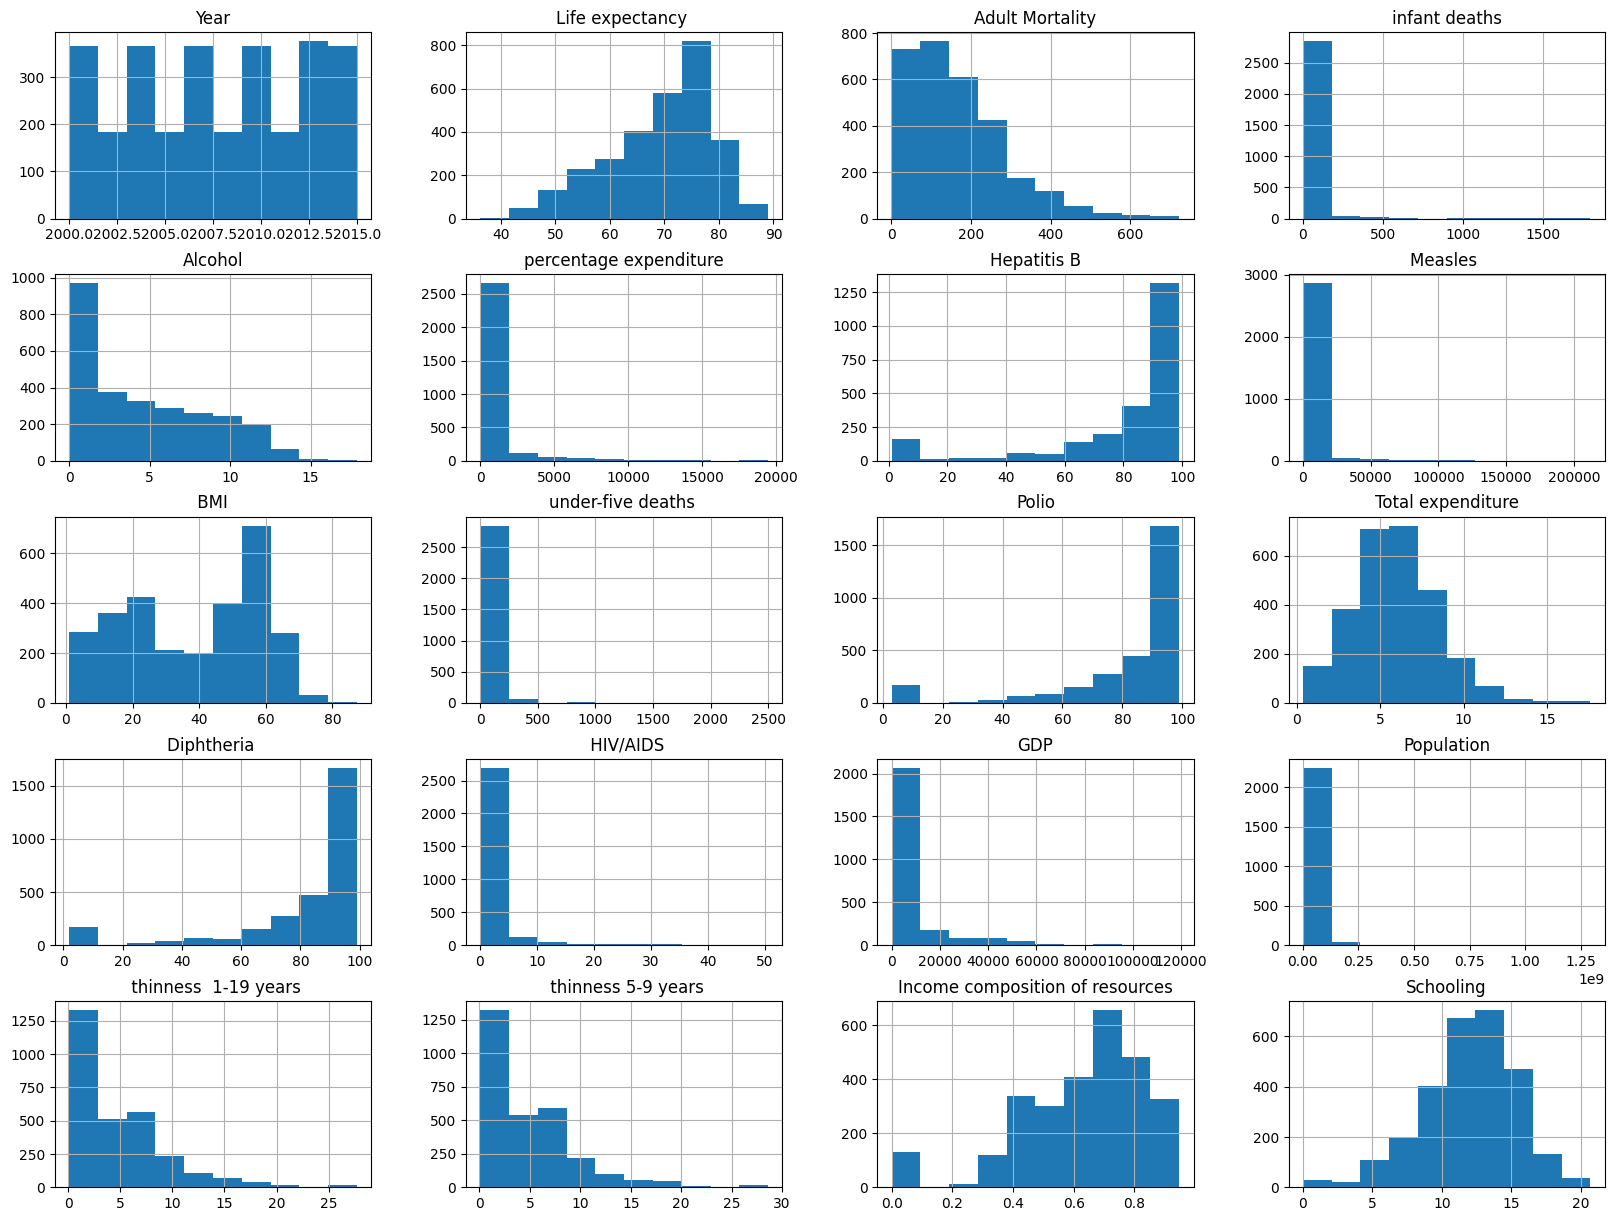

In [13]:
# univariate analysis: plotting the distribution of the all the columns
df.hist(figsize=(20,15));

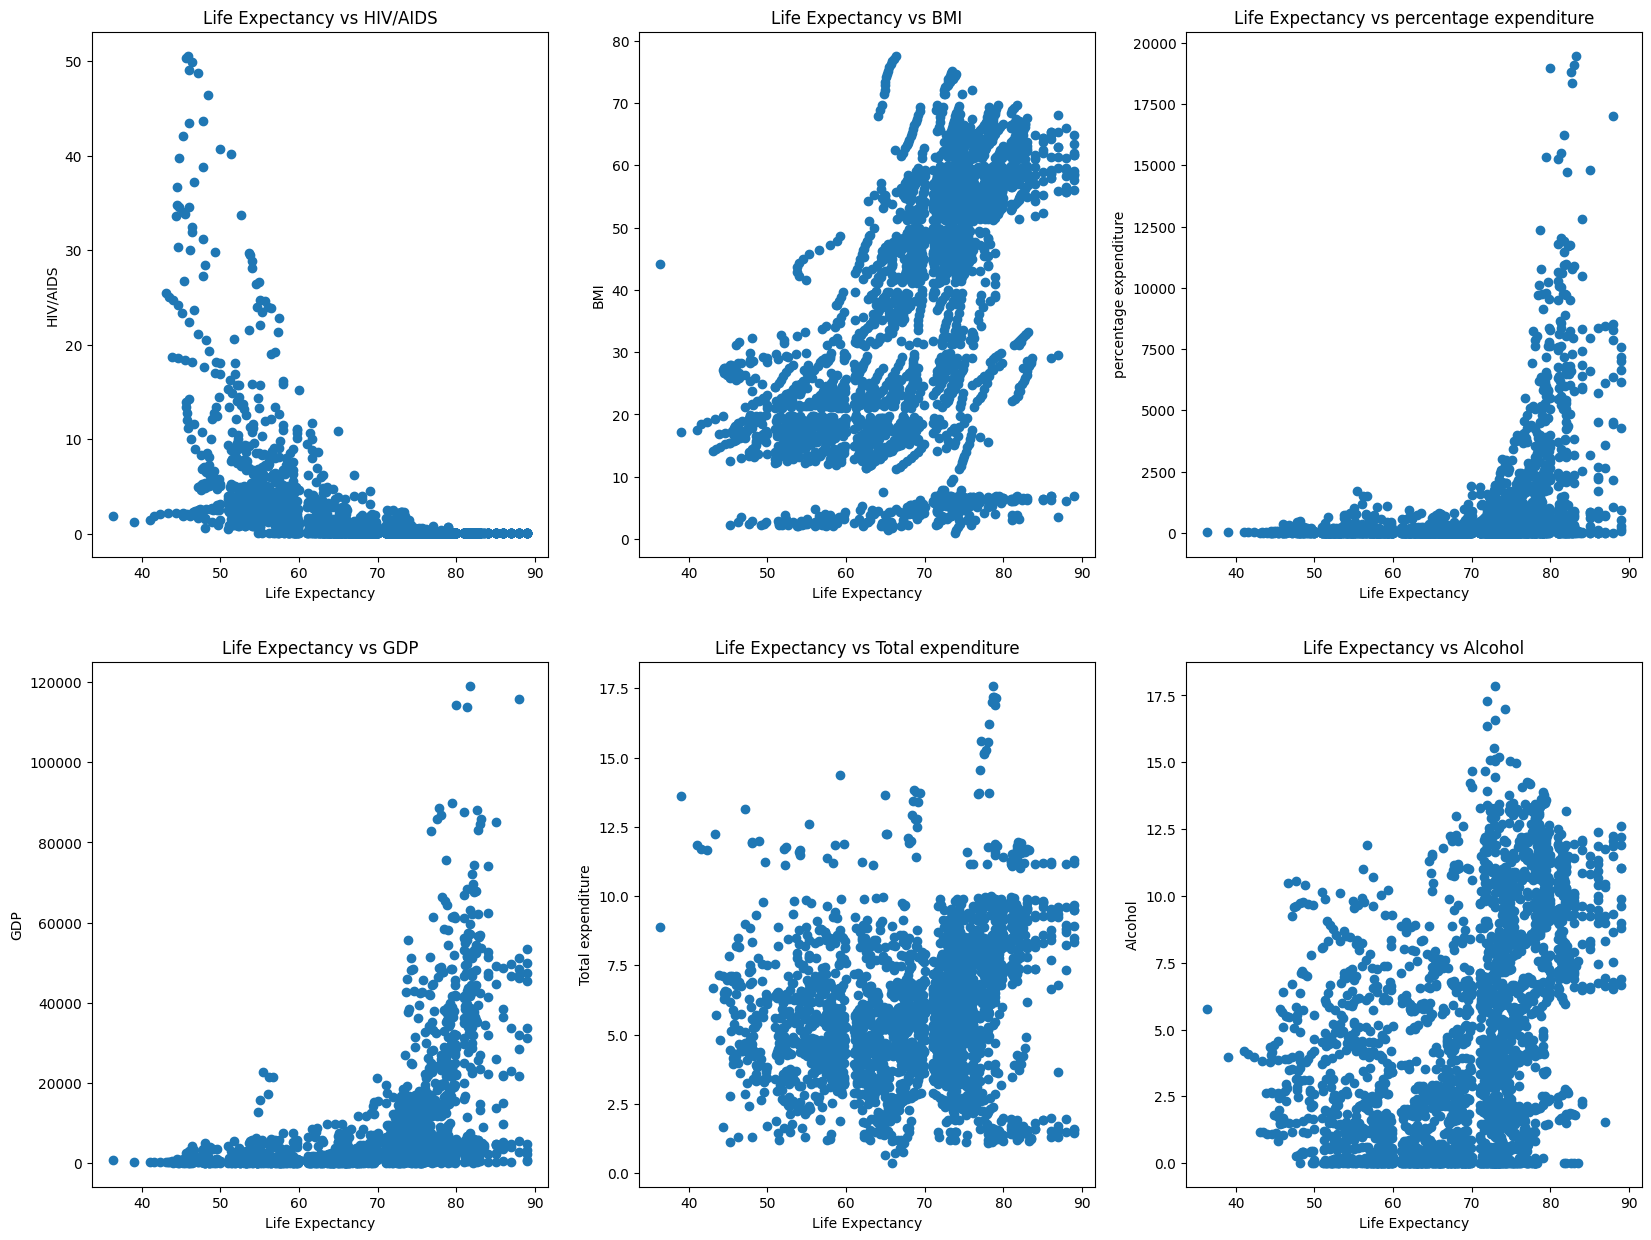

In [15]:
# bivariate analysis: plotting the distribution of notable features against the target variable
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.scatter(df['Life expectancy '],df[' HIV/AIDS'])
plt.xlabel('Life Expectancy')
plt.ylabel('HIV/AIDS')
plt.title('Life Expectancy vs HIV/AIDS');

plt.subplot(2,3,2)
plt.scatter(df['Life expectancy '],df[' BMI '])
plt.xlabel('Life Expectancy')
plt.ylabel('BMI')
plt.title('Life Expectancy vs BMI');

plt.subplot(2,3,3)
plt.scatter(df['Life expectancy '],df['percentage expenditure'])
plt.xlabel('Life Expectancy')
plt.ylabel('percentage expenditure')
plt.title('Life Expectancy vs percentage expenditure');

plt.subplot(2,3,4)
plt.scatter(df['Life expectancy '],df['GDP'])
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.title('Life Expectancy vs GDP');

plt.subplot(2,3,5)
plt.scatter(df['Life expectancy '],df['Total expenditure'])
plt.xlabel('Life Expectancy')
plt.ylabel('Total expenditure')
plt.title('Life Expectancy vs Total expenditure');

plt.subplot(2,3,6)
plt.scatter(df['Life expectancy '],df['Alcohol'])
plt.xlabel('Life Expectancy')
plt.ylabel('Alcohol')
plt.title('Life Expectancy vs Alcohol');


In [16]:
# checking the average life expectancy of the countries grouped by status
mean_life_expectancy = df.groupby('Status')['Life expectancy '].mean()
mean_life_expectancy


Status
Developed     79.197852
Developing    67.111465
Name: Life expectancy , dtype: float64

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

Text(0, 0.5, 'Life Expectancy')

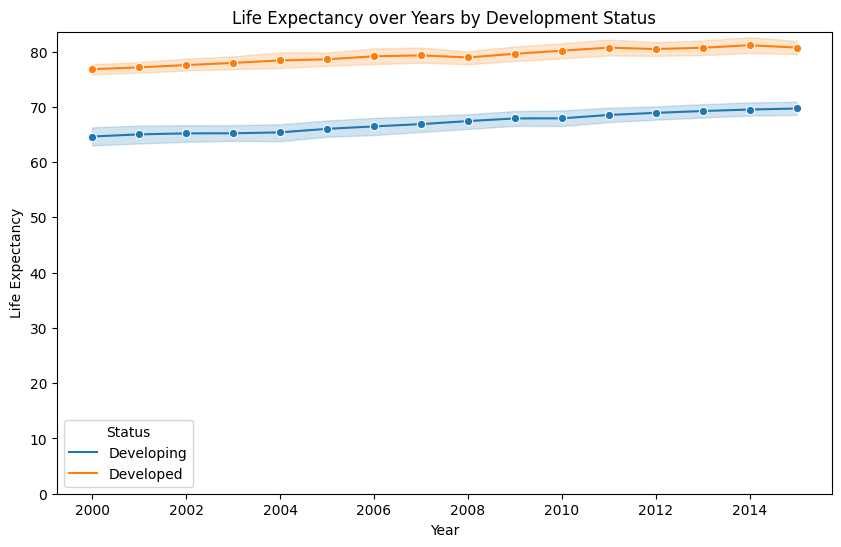

In [17]:
# Checking the temporal trend of life expectancy grouped by status
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Life expectancy ', hue='Status', marker='o').set_ylim(bottom=0)

plt.title('Life Expectancy over Years by Development Status')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')



In [18]:
# Checking the correlation between the features
df.select_dtypes(exclude='object').corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


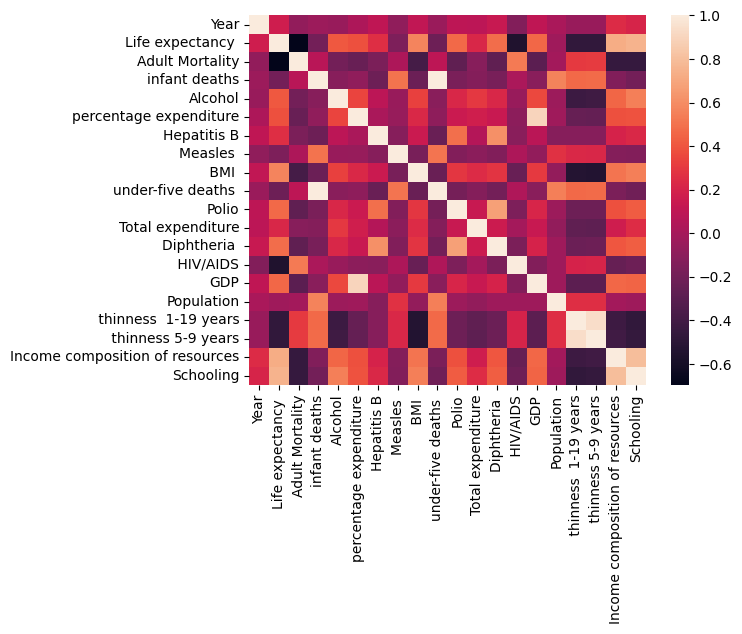

In [19]:
# plotting the correlation matrix
sns.heatmap(df.select_dtypes(exclude=['object']).corr());


In [20]:
# encoding the categorical variables
cols_to_dummy=train_set.select_dtypes(include='object').columns
train_set_dummy=pd.get_dummies(train_set,columns=cols_to_dummy,drop_first=True,dtype='int')
train_set_dummy.shape

(2351, 20)

In [21]:
# instantiating the imputer
imputer = KNNImputer(n_neighbors=15, metric='nan_euclidean')


In [22]:
# imputing the missing values using the KNN imputer
imputed_data = imputer.fit_transform(train_set_dummy.select_dtypes(exclude='object'))
imputed_data=pd.DataFrame(imputed_data,columns=train_set_dummy.columns)
imputed_data.isna().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developing                  0
dtype: int64

In [23]:


imputed_data.shape

(2351, 20)

In [24]:
imputed_data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing'],
      dtype='object')

In [25]:
imputed_data.isna().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developing                  0
dtype: int64

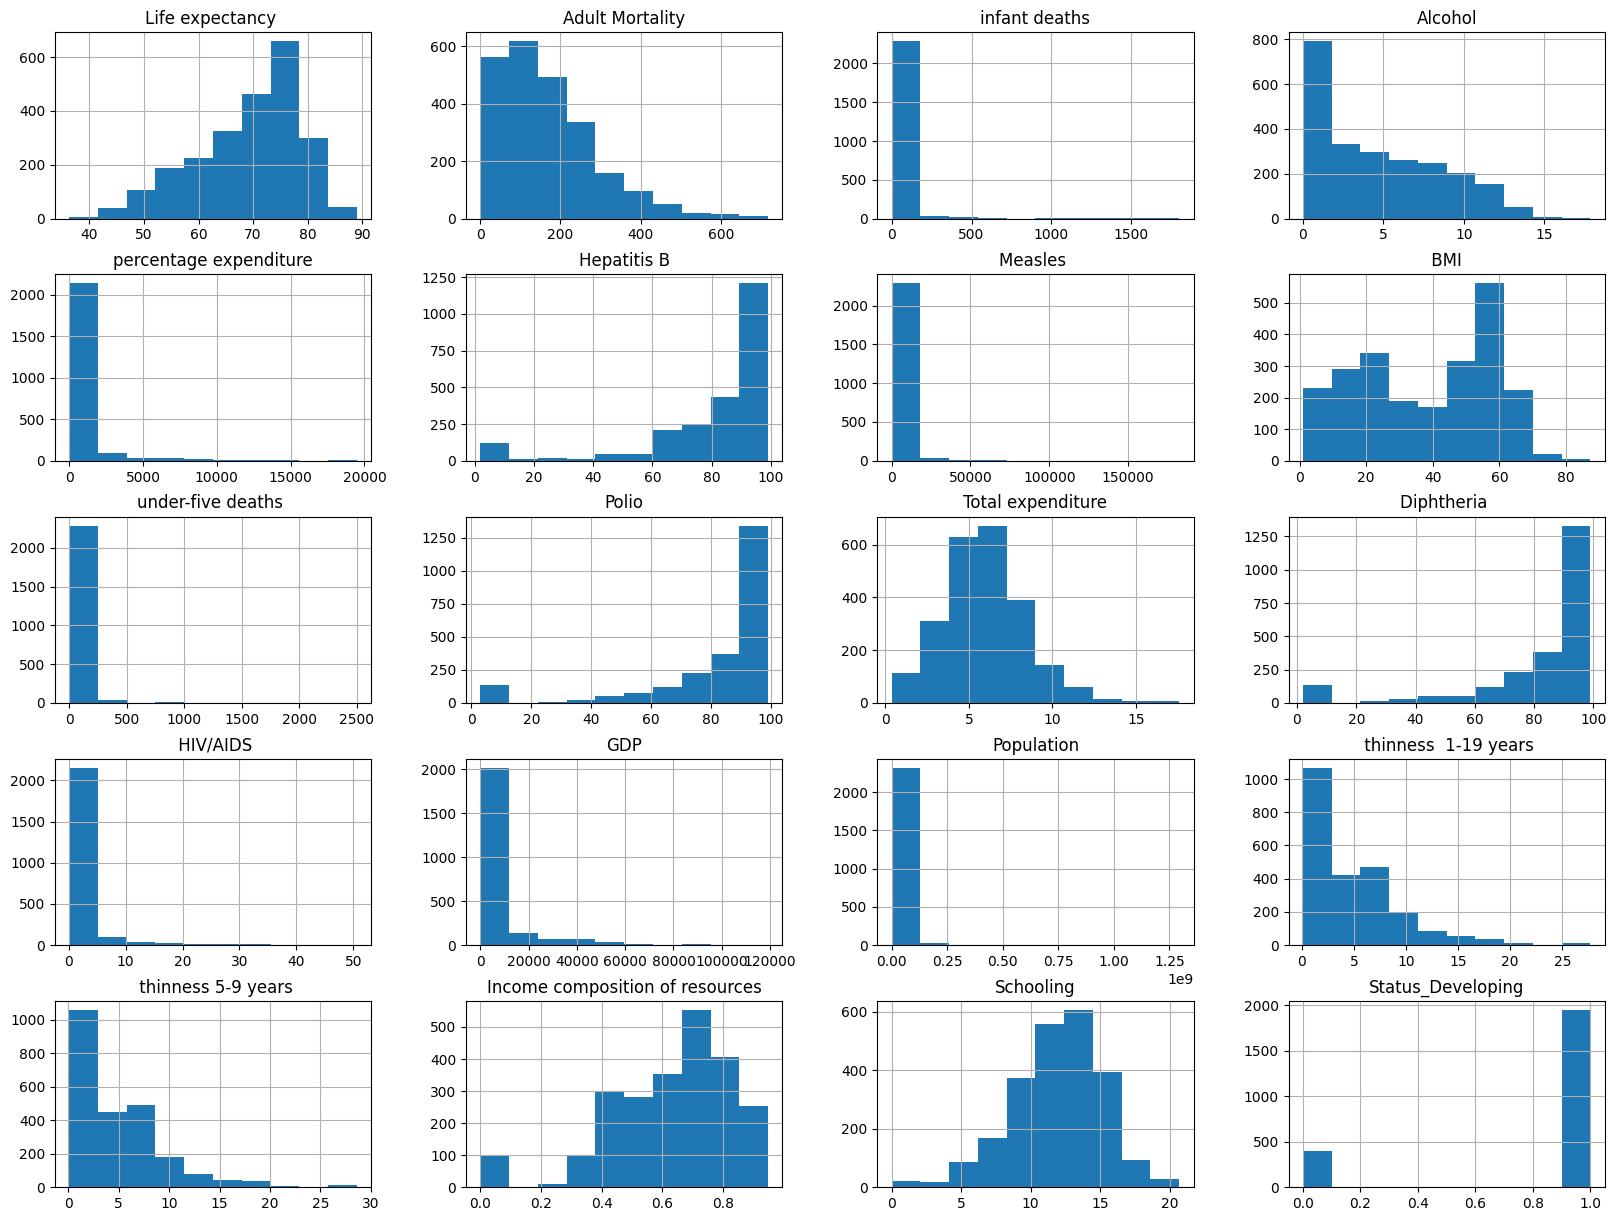

In [26]:
# comparing the distributions of the original and imputed data
imputed_data.hist(figsize=(20,15));

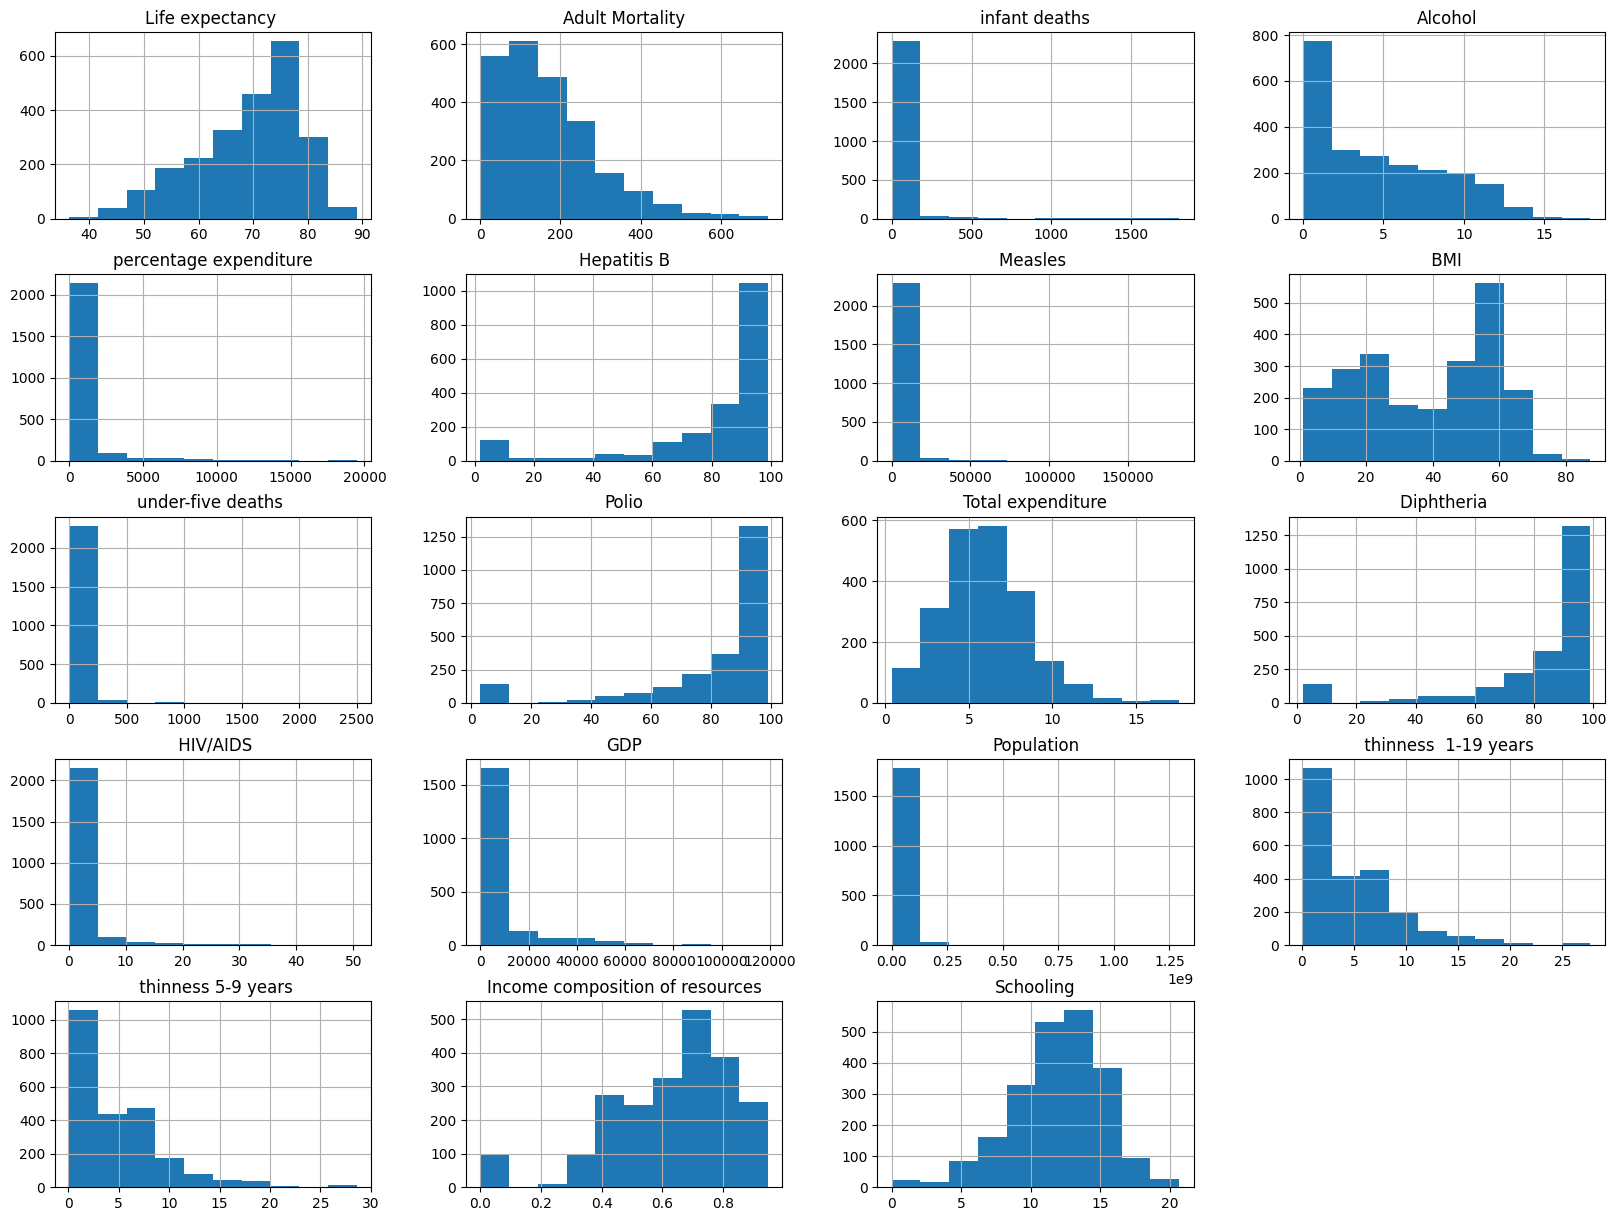

In [27]:
train_set.hist(figsize=(20,15));

In [28]:
# checking fr outliers using the isolation forest
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(imputed_data)
outlier_pred


array([ 1,  1,  1, ...,  1, -1,  1])

In [29]:
# Removing the outlierrs. This steps was not carried out in the final model
print("Number of outliers:", len(imputed_data[outlier_pred == -1]))
print("Number of rows without outliers:", len(imputed_data[outlier_pred == 1]))
imputed_data = imputed_data.iloc[outlier_pred == 1]

print("New shape:", imputed_data.shape)
imputed_data.shape  


Number of outliers: 184
Number of rows without outliers: 2167
New shape: (2167, 20)


(2167, 20)

In [30]:
# separating the categorical and numerical columns for scaling
cat_col=imputed_data['Status_Developing']
cat_col

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
2343    1.0
2344    1.0
2346    1.0
2348    0.0
2350    1.0
Name: Status_Developing, Length: 2167, dtype: float64

In [31]:
num_col=imputed_data.drop('Status_Developing',axis=1)

In [32]:
# scaling the numerical columns
scaler=StandardScaler()
scaled_data=scaler.fit_transform(num_col)
scaled_data=pd.DataFrame(scaled_data,columns=num_col.columns)

cat_col_reset = cat_col.reset_index(drop=True)
scaled_data['Status_Developing'] = cat_col_reset


In [33]:
# dropping the columns with null values in the target variable
train_set = train_set.dropna(subset=['Life expectancy '])

# separating the target variable from the features
life_expectancy = train_set['Life expectancy ']  
train_set_features = train_set.drop('Life expectancy ', axis=1)

In [34]:
train_set_features

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1264,Developed,89.0,0,14.27,4264.579203,NaN,241,52.2,0,84.0,6.60,84.0,0.1,28223.555280,3866243.0,0.3,0.3,0.857,16.4
2829,Developing,184.0,18,0.01,16.714063,99.0,0,42.2,21,99.0,6.49,99.0,0.1,174.468298,297745.0,3.0,3.1,0.673,12.0
1157,Developed,146.0,0,11.27,164.279341,NaN,2,63.0,1,99.0,7.74,99.0,0.1,12834.323490,992362.0,1.7,1.7,0.823,15.4
1840,Developed,77.0,1,9.56,5170.130703,NaN,11,55.0,1,98.0,8.52,98.0,0.1,39954.642220,16281779.0,1.0,1.0,0.885,16.5
556,Developing,1.0,2,6.37,584.099343,NaN,1,56.1,2,96.0,7.34,96.0,0.1,4787.699532,15799542.0,1.0,1.0,0.775,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Developing,297.0,22,0.01,41.251590,95.0,0,18.2,32,95.0,7.54,95.0,0.7,312.748979,989179.0,7.4,7.3,0.404,10.6
127,Developed,78.0,1,10.17,347.187360,NaN,108,58.2,2,9.0,8.80,9.0,0.1,2169.921000,19153.0,0.7,0.7,0.897,20.4
1551,Developed,95.0,0,12.91,910.506278,95.0,0,55.2,0,99.0,8.27,99.0,0.1,5293.641150,446175.0,1.0,0.9,0.860,13.5
142,Developed,92.0,0,12.40,3582.848308,44.0,0,5.6,0,83.0,1.12,84.0,0.1,24489.735530,842293.0,1.7,1.9,0.837,15.5


In [35]:
# Incorporating the preprocessing steps into a pipeline
# Let's first define our preprocessing steps for the categorical features.
# We're using OneHotEncoder here to convert categorical variables into a form that could be provided to ML algorithms.
categorical_features = train_set_features.select_dtypes(include='object').columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', dtype='int',handle_unknown='ignore'))
])

# Next, for the numerical features, we'll impute any missing values using KNNImputer and then scale them.
numerical_features = train_set_features.select_dtypes(exclude='object').columns
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=15, metric='nan_euclidean'))

])

# Now let's combine these preprocessing steps into one ColumnTransformer. This allows us to apply different transformations to different columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# I'll now create the full pipeline, integrating the preprocessor with a RandomForestRegressor as our regression model.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42, max_depth=5))
])

# We'll now fit the pipeline on our training set. This will apply all the preprocessing steps followed by training our regressor.
pipeline.fit(train_set_features, life_expectancy) 


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=15))]),
                                                  Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Status'], dtype='object'))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [36]:
categorical_features

Index(['Status'], dtype='object')

In [37]:
# checking the performance of the model using cross validation
tree_rmses = -cross_val_score(pipeline, train_set_features, life_expectancy,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()


count    10.000000
mean      3.072489
std       0.249835
min       2.739335
25%       2.885092
50%       3.003951
75%       3.272909
max       3.460465
dtype: float64

In [38]:
# checking the performance on the training set

pipeline.fit(train_set_features, life_expectancy)
predictions = pipeline.predict(train_set_features)
tree_rmse = mean_squared_error(life_expectancy, predictions,
                                 squared=False)
tree_rmse

2.750325348802033

In [39]:
# Tuning with GridSearchCV
decision_tree_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("decision_tree", DecisionTreeRegressor(random_state=42)),
])

# Defining the parameter grid for the decision tree
param_grid = [
    {'decision_tree__max_depth': [3, 5, 7],
     'decision_tree__min_samples_split': [2, 10, 20],
     'decision_tree__min_samples_leaf': [10,30,40]}
]

# Creating the grid search object
grid_search = GridSearchCV(decision_tree_pipeline, param_grid, cv=10,
                           scoring='neg_root_mean_squared_error')

# Fitting the grid search to the data
grid_search.fit(train_set_features, life_expectancy) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=15))]),
                                                                         Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' t...
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        dtype='int',
                                                                                                        handle_unknown='ignore'))]),
                                                                         Index(['Status'], dtype='object'))])),
                                       ('decision_tree',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid=[{'decision_tree__max_depth': [3, 5, 7],
                          'decision_tree__min_samples_leaf': [10, 30, 40],
                          'decision_tree__min_samples_split': [2, 10, 20]}],
             scoring='neg_root_mean_squared_error')

In [40]:
print (grid_search.best_params_)

print (grid_search.best_score_)

print (grid_search.best_estimator_)
# saving the best model
final_model = grid_search.best_estimator_

{'decision_tree__max_depth': 7, 'decision_tree__min_samples_leaf': 10, 'decision_tree__min_samples_split': 2}
-2.749682133892204
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=15))]),
                                                  Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                       

In [41]:
# printing the detailed results of the grid search
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head(10) 



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree__max_depth,param_decision_tree__min_samples_leaf,param_decision_tree__min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
20,0.394931,0.008266,0.058031,0.009200,7,10,20,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.612965,-2.812491,...,-2.593679,-2.630471,-3.194623,-2.909758,-2.673151,-2.827659,-2.595453,-2.749682,0.181972,1
19,0.411587,0.028280,0.065567,0.015044,7,10,10,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.612965,-2.812491,...,-2.593679,-2.630471,-3.194623,-2.909758,-2.673151,-2.827659,-2.595453,-2.749682,0.181972,1
18,0.458841,0.041099,0.077901,0.019508,7,10,2,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.612965,-2.812491,...,-2.593679,-2.630471,-3.194623,-2.909758,-2.673151,-2.827659,-2.595453,-2.749682,0.181972,1
23,0.398273,0.016103,0.056761,0.006737,7,30,20,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.991930,-3.110274,...,-2.968419,-2.869531,-3.296753,-2.983522,-2.910497,-3.247044,-2.673622,-3.027396,0.183326,4
22,0.410173,0.029397,0.061043,0.007316,7,30,10,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.991930,-3.110274,...,-2.968419,-2.869531,-3.296753,-2.983522,-2.910497,-3.247044,-2.673622,-3.027396,0.183326,4
21,0.394172,0.017666,0.058187,0.006194,7,30,2,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.991930,-3.110274,...,-2.968419,-2.869531,-3.296753,-2.983522,-2.910497,-3.247044,-2.673622,-3.027396,0.183326,4
26,0.387190,0.025804,0.058624,0.009055,7,40,20,"{'decision_tree__max_depth': 7, 'decision_tree...",-3.004730,-3.192300,...,-2.859617,-2.914533,-3.417154,-3.054707,-2.780970,-3.236936,-2.807896,-3.034645,0.193923,7
25,0.405167,0.035625,0.057646,0.006850,7,40,10,"{'decision_tree__max_depth': 7, 'decision_tree...",-3.004730,-3.192300,...,-2.859617,-2.914533,-3.417154,-3.054707,-2.780970,-3.236936,-2.807896,-3.034645,0.193923,7
24,0.397497,0.018470,0.059441,0.013033,7,40,2,"{'decision_tree__max_depth': 7, 'decision_tree...",-3.004730,-3.192300,...,-2.859617,-2.914533,-3.417154,-3.054707,-2.780970,-3.236936,-2.807896,-3.034645,0.193923,7
9,0.412599,0.027213,0.059429,0.009731,5,10,2,"{'decision_tree__max_depth': 5, 'decision_tree...",-3.158022,-3.273921,...,-2.828256,-2.994884,-3.469300,-3.066053,-2.770421,-3.272560,-2.838320,-3.062230,0.217022,10


In [42]:
# applying the preprocessing steps on the test set + the piepline
test_set = test_set.dropna(subset=['Life expectancy '])

X_test = test_set.drop("Life expectancy ", axis=1)
y_test = test_set["Life expectancy "]
# predicting the target variable
final_predictions = final_model.predict(test_set)

# evaluating the performance of the model on the test set
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)



2.738148279214379


In [43]:
names=train_set_features.columns.tolist()

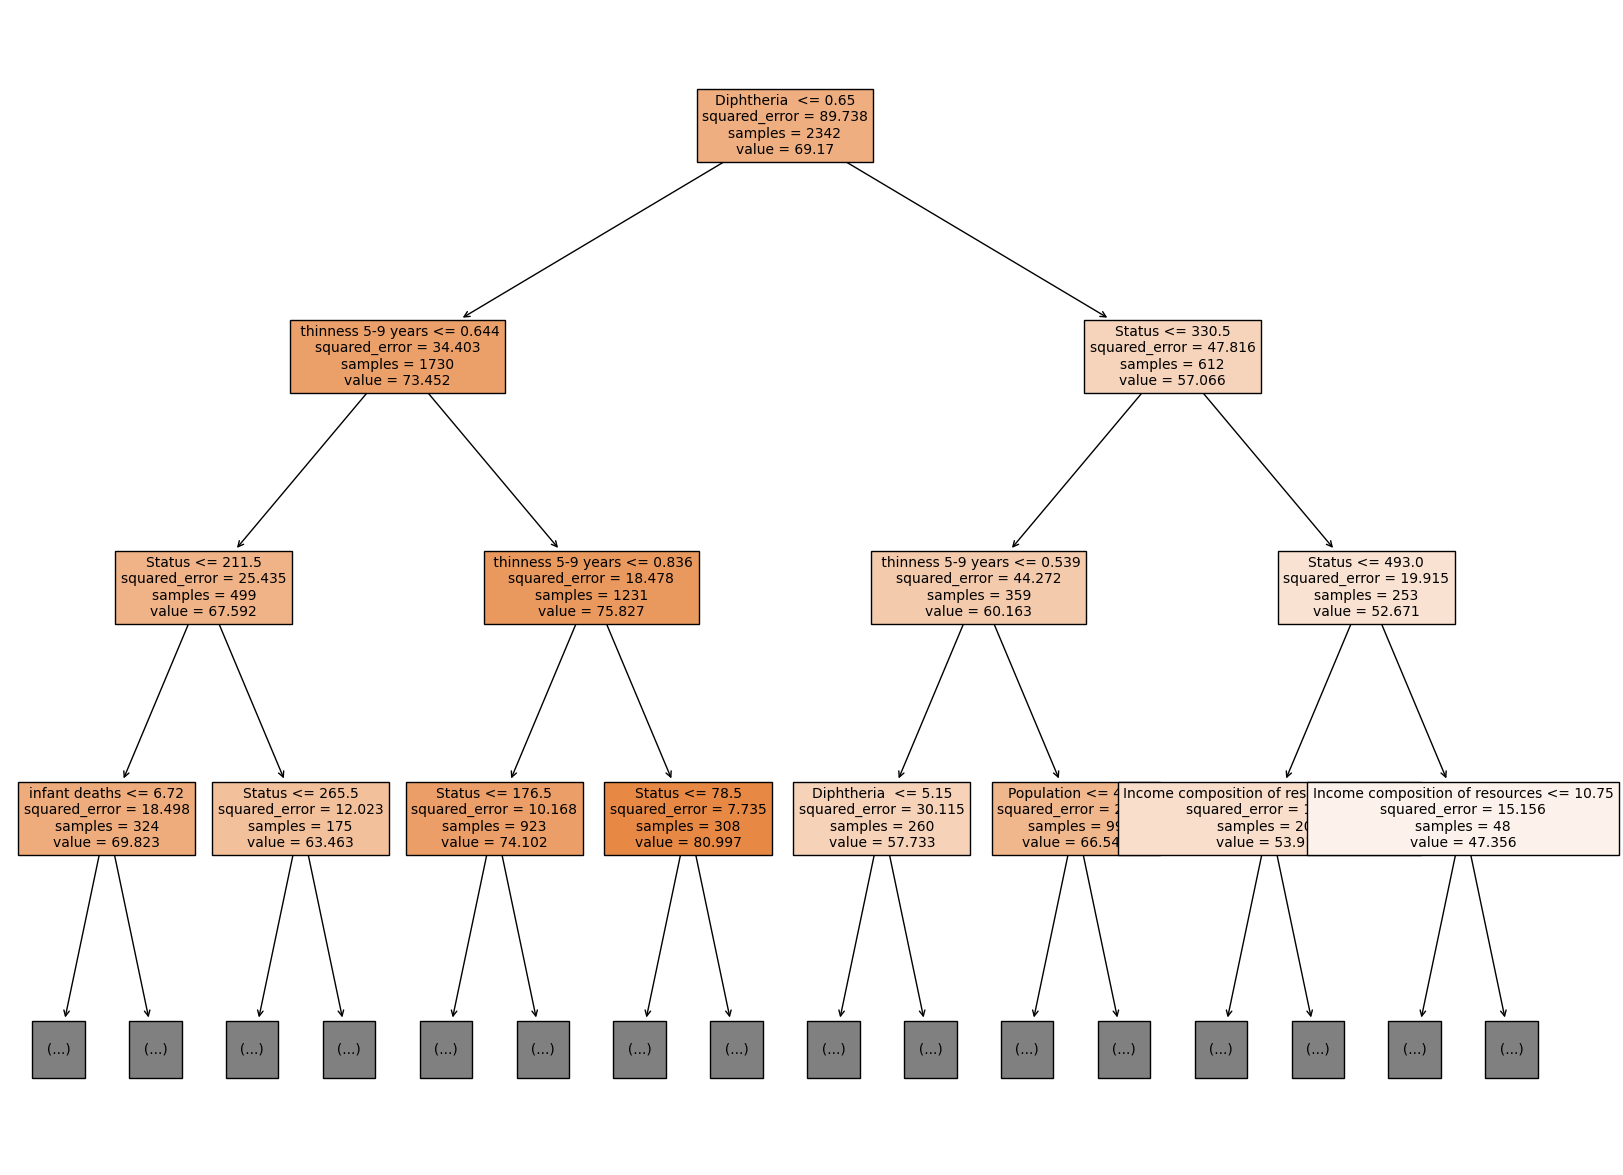

In [44]:
# plotting the decision tree
decision_tree_model = final_model.named_steps['decision_tree']
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))

# Setting the max_depth parameter to show the top 3 levels of the tree: This enhances exolainability
top_levels = 3
plot_tree(decision_tree_model, filled=True, max_depth=top_levels, feature_names=names, fontsize=10)

plt.show()


In [45]:
# printing the feature importances
feature_importances = final_model.named_steps['decision_tree'].feature_importances_
importance_df = pd.DataFrame({'Feature': train_set_features.columns, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importance_df)


                            Feature  Importance
11                      Diphtheria     0.627862
16               thinness 5-9 years    0.209532
0                            Status    0.112118
1                   Adult Mortality    0.007922
2                     infant deaths    0.007140
15             thinness  1-19 years    0.006999
14                       Population    0.006319
8                under-five deaths     0.005790
17  Income composition of resources    0.005031
7                              BMI     0.002503
9                             Polio    0.002341
12                         HIV/AIDS    0.002109
10                Total expenditure    0.001594
6                          Measles     0.001253
13                              GDP    0.000850
5                       Hepatitis B    0.000382
18                        Schooling    0.000254
4            percentage expenditure    0.000000
3                           Alcohol    0.000000


In [46]:
# printing the decision rules
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}")

    recurse(0, 1)

tree_to_code(decision_tree_model, train_set_features.columns)


  if Diphtheria  <= 0.65:
    if  thinness 5-9 years <= 0.64:
      if Status <= 211.50:
        if infant deaths <= 6.72:
          if under-five deaths  <= 82.50:
            if  BMI  <= 39.50:
              if  HIV/AIDS <= 2640.32:
                return [[67.54509804]]
              else:  # if  HIV/AIDS > 2640.32
                return [[71.60833333]]
            else:  # if  BMI  > 39.50
              if  thinness 5-9 years <= 0.46:
                return [[61.45]]
              else:  # if  thinness 5-9 years > 0.46
                return [[65.64444444]]
          else:  # if under-five deaths  > 82.50
            if Status <= 163.50:
              if Status <= 55.00:
                return [[69.075]]
              else:  # if Status > 55.00
                return [[72.6972973]]
            else:  # if Status > 163.50
              if  thinness  1-19 years <= 3.15:
                return [[70.05666667]]
              else:  # if  thinness  1-19 years > 3.15
                retur